# Image processing: transformation and filtering


# Step 1: Load and Preprocess Your Image

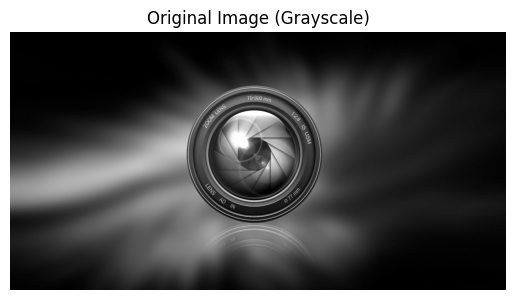

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color, filters, exposure
from skimage.filters import gaussian, threshold_otsu

# Load your image
image = io.imread("image.jpg")  # Ensure "image.jpg" is in the same folder as your notebook

# Convert to grayscale (required for thresholding)
if len(image.shape) == 3:  # Check if image is color (RGB)
    gray_image = color.rgb2gray(image) * 255  # Convert to grayscale and scale to 0-255
    gray_image = gray_image.astype(np.uint8)   # Convert to integer type
else:
    gray_image = image  # Use as-is if already grayscale

# Display original image
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image (Grayscale)')
plt.axis('off')
plt.show()

## Step 2.1: Linear Transformations (Brightness & Contrast)

### 1. Brightness Adjustment (+70)
**Purpose:**  
Increase overall image brightness to bring out details in dark regions.

**Observed Effects:**  
- Shadows and dark areas become noticeably more visible  
- Bright highlights may clip to white, causing slight overexposure  

**Key Parameter:**  
- `+70` (added uniformly to every pixel value)

**Use Case:**  
Correcting under-exposed photos or night-time shots

---

### 2. Contrast Stretching
**Purpose:**  
Expand the tonal range to accentuate differences between light and dark regions.

**Observed Effects:**  
- Fine textures (e.g., fabric weaves, clouds) appear sharper  
- Intensities are remapped between the 2nd and 98th percentiles, minimizing outlier impact  

**Key Parameter:**  
- Percentile range `(2%, 98%)`

**Use Case:**  
Enhancing foggy or otherwise low-contrast images


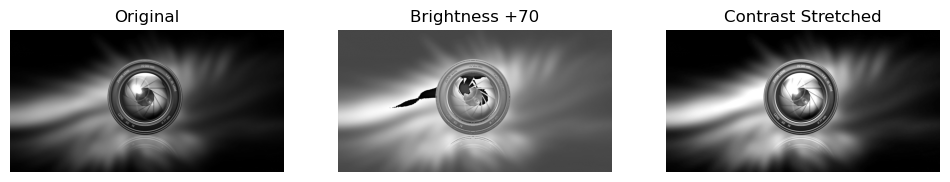

In [3]:
# Brightness adjustment (+70)
brightness_adjusted = np.clip(gray_image + 70, 0, 255)

# Contrast stretching
p2, p98 = np.percentile(gray_image, (2, 98))
contrast_stretched = exposure.rescale_intensity(gray_image, in_range=(p2, p98))

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(brightness_adjusted, cmap='gray')
plt.title('Brightness +70')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast Stretched')
plt.axis('off')
plt.show()

## Step 2.2: Image Filtering (Mean & Gaussian)

### 1. Mean Filtering (5×5 Kernel)  
**Purpose:**  
Reduce random noise by averaging each pixel with its neighbours.

**Observed Effects:**  
- Grainy “salt-and-pepper” noise is smoothed out  
- Fine edges and textures become softer (e.g., text or thin lines appear fuzzy)

**Key Parameter:**  
- **Kernel size:** 5×5 (larger kernels produce stronger blur)

**Use Case:**  
Preprocessing noisy medical scans (e.g., MRI or CT images) before further analysis

---

### 2. Gaussian Filtering (σ = 2)  
**Purpose:**  
Smooth noise with a Gaussian-weighted average, preserving edges better than a simple mean filter.

**Observed Effects:**  
- Gentle, natural blur without blocky artifacts  
- Object outlines (e.g., building edges) remain sharp  

**Key Parameter:**  
- **σ (sigma):** 2 (controls the spread of the Gaussian kernel)

**Use Case:**  
Preparing images for edge-detection algorithms (e.g., Canny or Sobel filters)


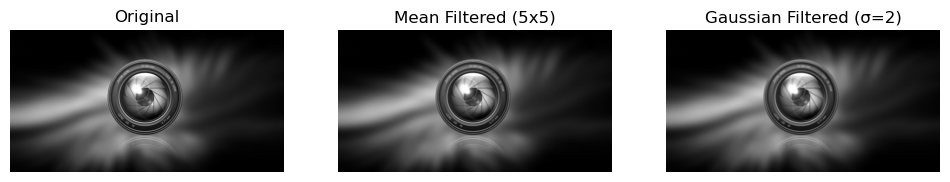

In [4]:
# Apply mean filter (5x5 kernel)
mean_filtered = filters.rank.mean(gray_image, np.ones((5, 5)))

# Apply Gaussian filter (sigma=2)
gaussian_filtered = gaussian(gray_image, sigma=2)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filtered (5x5)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered (σ=2)')
plt.axis('off')
plt.show()

## Step 2.3: Global Thresholding (Otsu’s Method)

### Otsu’s Thresholding  
**Purpose:**  
Automatically compute an intensity cutoff that best separates foreground from background.

**Observed Effects:**  
- Converts the image into a binary mask (black & white)  
- Calculates an optimal threshold (e.g., **71**) by maximizing between-class variance  

**Key Parameter:**  
- **Threshold value:** 71 (auto-determined)

**Failure Cases:**  
- Poor performance under uneven lighting (e.g., shadows or gradients)  
- Ineffective when object and background intensities overlap significantly  

**Use Case:**  
Segmenting text in scanned documents prior to OCR


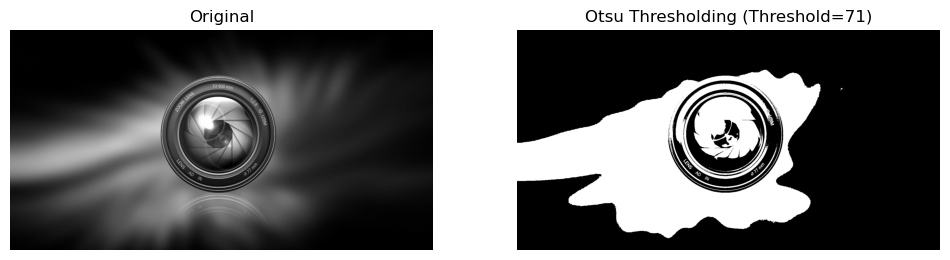

In [5]:
# Calculate optimal threshold
thresh = threshold_otsu(gray_image)
binary = gray_image > thresh  # Binarize image

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary, cmap='gray')
plt.title(f'Otsu Thresholding (Threshold={thresh})')
plt.axis('off')
plt.show()

## Step 2.4: Edge Detection (Sobel & Prewitt)

### Sobel and Prewitt Filters  
**Purpose:**  
Detect edges in the image by computing intensity gradients. These methods highlight regions with strong intensity changes (object boundaries).

**Observed Effects:**  
- Outputs grayscale images showing detected edges  
- Sobel emphasizes edges in horizontal and vertical directions  
- Prewitt provides a similar result but with a slightly different kernel

**Key Parameters:**  
- No manual thresholding needed  
- Uses convolutional kernels to estimate gradients  

**Failure Cases:**  
- May capture noise as edges if the image is not smoothed  
- Less effective on textured or complex backgrounds  

**Use Case:**  
Highlighting object contours in grayscale images, often as a pre-processing step for segmentation or feature extraction.

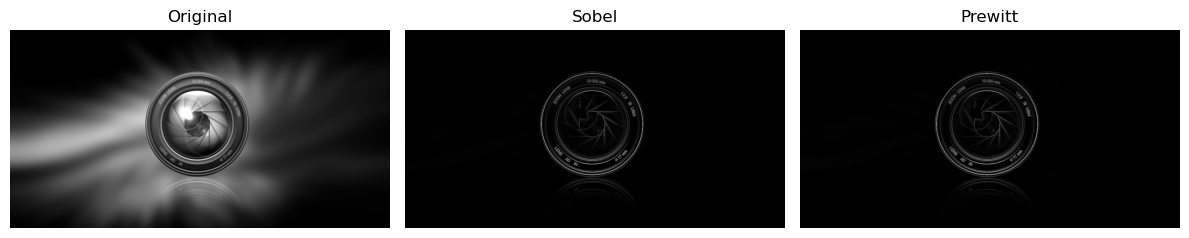

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from skimage.filters import sobel, prewitt

# Load & grayscale
image = io.imread("image.jpg")
if image.ndim == 3:
    gray = (color.rgb2gray(image) * 255).astype(np.uint8)
else:
    gray = image

# Apply Sobel and Prewitt
edges_sobel   = sobel(gray)
edges_prewitt = prewitt(gray)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(gray, cmap='gray');        axes[0].set_title("Original")
axes[1].imshow(edges_sobel, cmap='gray'); axes[1].set_title("Sobel")
axes[2].imshow(edges_prewitt, cmap='gray'); axes[2].set_title("Prewitt")
for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()


## Step 2.5: Contrast Enhancement (Histogram Equalization)

### Histogram Equalization  
**Purpose:**  
Enhance image contrast by redistributing pixel intensity values to span the full intensity range.

**Observed Effects:**  
- Improves visibility of details in underexposed or low-contrast images  
- Intensities are spread more evenly across the histogram  
- The output is normalized to \[0, 1\] for float representation

**Key Parameter:**  
- **Equalization method:** Global histogram equalization (`exposure.equalize_hist`)

**Failure Cases:**  
- Can amplify noise in flat regions  
- May distort brightness in already well-exposed images  

**Use Case:**  
Preprocessing step for improving visual clarity or preparing data for edge detection and segmentation tasks.


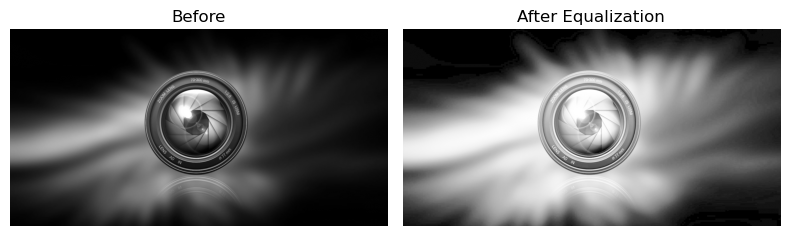

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, exposure, color

# Load & grayscale
image = io.imread("image.jpg")
if image.ndim == 3:
    gray = (color.rgb2gray(image) * 255).astype(np.uint8)
else:
    gray = image

# Equalize histogram
hist_eq = exposure.equalize_hist(gray)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(gray, cmap='gray');     axes[0].set_title("Before")
axes[1].imshow(hist_eq, cmap='gray');  axes[1].set_title("After Equalization")
for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()


## Step 2.4: Image Sharpening (Convolution Filter)

### Sharpening Filter (Laplacian-based)  
**Purpose:**  
Enhance fine details and edges in the image by emphasizing intensity changes.

**Observed Effects:**  
- Makes object boundaries more distinct  
- Highlights small structures and textures  
- Output appears clearer and more detailed

**Key Parameter:**  
- **Kernel:**  
  \[
  \begin{bmatrix}
  -1 & -1 & -1 \\
  -1 &  9 & -1 \\
  -1 & -1 & -1 \\
  \end{bmatrix}
  \]  
  A basic sharpening kernel that boosts the center pixel relative to its neighbors.

**Failure Cases:**  
- Can amplify noise, especially in textured or low-contrast areas  
- May introduce artifacts if used on already sharp or noisy images  

**Use Case:**  
Preprocessing before segmentation or feature extraction, or enhancing visual appeal in grayscale photography.


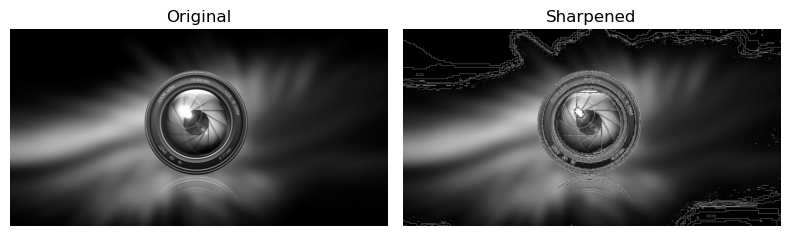

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
from scipy import ndimage

# Load & grayscale
image = io.imread("image.jpg")
if image.ndim == 3:
    gray = (color.rgb2gray(image) * 255).astype(np.uint8)
else:
    gray = image

# Define sharpening kernel
kernel = np.array([
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]
])

# Convolve
sharpened = ndimage.convolve(gray, kernel, mode='reflect')

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(gray, cmap='gray');       axes[0].set_title("Original")
axes[1].imshow(sharpened, cmap='gray');  axes[1].set_title("Sharpened")
for ax in axes: ax.axis('off')
plt.tight_layout()
plt.show()
